## 순환 신경망 이해하기
* **피드포워드 네트워크**(feedforward network)
    * 메모리가 없다.
    * 네트워크에 주입되는 입력은 개별적으로 처리되며 입력 간에 유지되는 상태가 없다.
---
* **순환 신경망(Recurrent Neural Network, RNN)**
* 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 **상태(state)**에 저장한다.
* pseudocode
---
```
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
```
---
```
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
```

In [2]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

### 케라스의 순환 층

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('data loading...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'training sequence')
print(len(input_test), 'test sequence')

print('sequence padding (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

data loading...
25000 training sequence
25000 test sequence
sequence padding (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 41s 249ms/step - loss: 0.6091 - acc: 0.6535 - val_loss: 0.4650 - val_acc: 0.7928
Epoch 2/10
157/157 [==============================] - 38s 242ms/step - loss: 0.3803 - acc: 0.8407 - val_loss: 0.3633 - val_acc: 0.8500
Epoch 3/10
157/157 [==============================] - 38s 240ms/step - loss: 0.2956 - acc: 0.8814 - val_loss: 0.3621 - val_acc: 0.8436
Epoch 4/10
157/157 [==============================] - 39s 247ms/step - loss: 0.2515 - acc: 0.9020 - val_loss: 0.3604 - val_acc: 0.8476
Epoch 5/10
157/157 [==============================] - 39s 250ms/step - loss: 0.1895 - acc: 0.9308 - val_loss: 0.4260 - val_acc: 0.8192
Epoch 6/10
157/157 [==============================] - 39s 249ms/step - loss: 0.1533 - acc: 0.9435 - val_loss: 0.3934 - val_acc: 0.8434
Epoch 7/10
157/157 [==============================] - 38s 245ms/step - loss: 0.1239 - acc: 0.9566 - val_loss: 0.4545 - val_acc: 0.8198
Epoch 8/10
157/157 [==============================] - 3

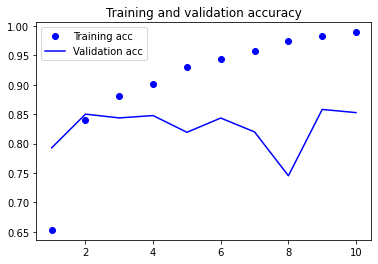

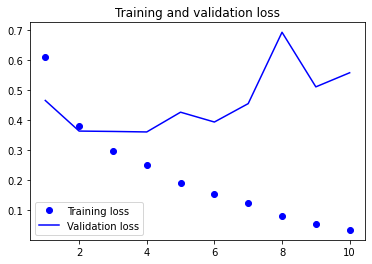

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### LSTM과 GRU 층 이해하기
* SimpleRNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있다.
* 층이 많은 일반 네트워크(피드포워드 네트워크)에서 나타나는 것과 비슷한 현상인 **그래디언트 소실 문제**(vanishing gradient problem)**때문이다.
---
* 장ㆍ단기 메모리(Long Short-Term Memory, LSTM) 알고리즘은 그래디언트 소실 문제에 대한 연구의 결정체이다.
* LSTM pseudocode
---
```
output_t = activation(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(Input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

C_t + 1 = i_t * k_t + c_t * f_t
```

### 케라스를 사용한 LSTM 예제

In [11]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 26ms/step - loss: 0.5140 - acc: 0.7570 - val_loss: 0.4268 - val_acc: 0.8006
Epoch 2/10
157/157 [==============================] - 4s 23ms/step - loss: 0.3039 - acc: 0.8785 - val_loss: 0.4712 - val_acc: 0.8232
Epoch 3/10
157/157 [==============================] - 3s 22ms/step - loss: 0.2378 - acc: 0.9090 - val_loss: 0.3510 - val_acc: 0.8530
Epoch 4/10
157/157 [==============================] - 4s 22ms/step - loss: 0.2047 - acc: 0.9254 - val_loss: 0.3733 - val_acc: 0.8766
Epoch 5/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1804 - acc: 0.9333 - val_loss: 0.3058 - val_acc: 0.8826
Epoch 6/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1607 - acc: 0.9424 - val_loss: 0.2997 - val_acc: 0.8800
Epoch 7/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1472 - acc: 0.9481 - val_loss: 0.3011 - val_acc: 0.8864
Epoch 8/10
157/157 [==============================] - 3s 22ms/step - 

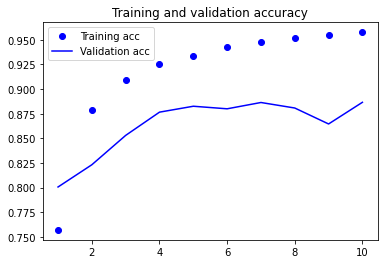

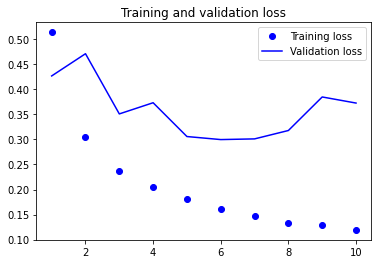

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 정리
* RNN이 무엇이고 동작하는 방법
* LSTM이 무엇이고 긴 시퀀스에서 단순한 RNN보다 더 잘 작동하는 이유
* 케라스의 RNN 층을 사용하여 시퀀스 데이터를 처리하는 방법